In [10]:
import numpy as np
from skimage import morphology
from matplotlib import pyplot as plt

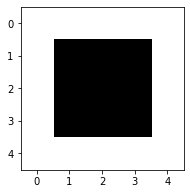

In [11]:
square = np.array([[0, 0, 0, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 0, 0, 0]], dtype=np.uint8)

fig = plt.figure(figsize=(3,3))
plt.imshow(square, "binary")
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


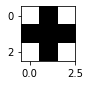

In [16]:
# Morphology Filter size
struct_element = morphology.selem.diamond(1)
print(struct_element)

fig = plt.figure(figsize=(1,1))
plt.imshow(struct_element, cmap="binary")
plt.show()

<function matplotlib.pyplot.imshow>

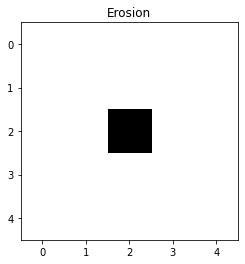

In [21]:
# Apply erosion
eroded_square = sk_mm.erosion(square, struct_element)

plt.imshow(eroded_square, "binary")
plt.title("Erosion")
plt.imshow

<function matplotlib.pyplot.imshow>

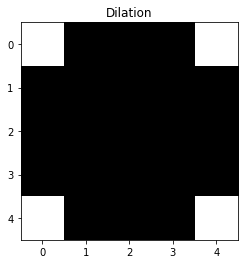

In [22]:
#Apply dilation
dilated_square = morphology.dilation(square, struct_element)

plt.imshow(dilated_square, "binary")
plt.title("Dilation")
plt.imshow

<function matplotlib.pyplot.imshow>

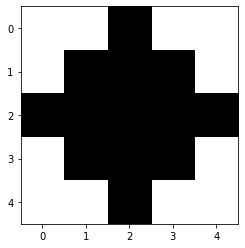

In [23]:
dilated_square = sk_mm.dilation(square, struct_element)
closed_square = sk_mm.erosion(dilated_square, struct_element)

plt.imshow(closed_square, "binary")
plt.imshow

<function matplotlib.pyplot.imshow>

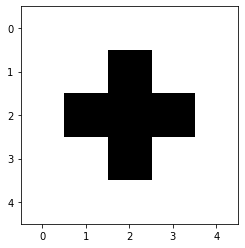

In [24]:
eroded_square = sk_mm.erosion(square, struct_element)
opened_square = sk_mm.dilation(eroded_square, struct_element)

plt.imshow(opened_square, "binary")
plt.imshow

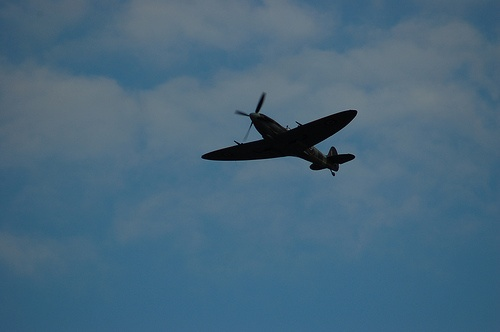

In [75]:
import os
from PIL import Image

# Load the image from the source file
image_file = "data/voc/plane/008372.jpg"
image = Image.open(image_file)
image

In [98]:
def apply_morphology(image):
    from skimage import io as sk_io
    import skimage.color as sk_col
    
    
    image = np.array(image)
    bw_image = sk_col.rgb2gray(image)
    eroded_image = morphology.erosion(bw_image)
    dilated_image = morphology.dilation(bw_image)
    closed_image = morphology.closing(bw_image)
    opened_image = morphology.opening(bw_image)

    fig = plt.figure(figsize=(18,18))

    a = fig.add_subplot(3,3,1)
    imgplot = plt.imshow(eroded_image, "gray")
    a.set_title("Eroded Image")

    a = fig.add_subplot(3,3,2)
    imgplot = plt.imshow(dilated_image, "gray")
    a.set_title("Dilated Image")


    a = fig.add_subplot(3,3,3)
    imgplot = plt.imshow(closed_image, "gray")
    a.set_title("Closed Image")

    a = fig.add_subplot(3,3,4)
    imgplot = plt.imshow(opened_image, "gray")
    a.set_title("Closed Image")

    a = fig.add_subplot(3,3,5)
    imgplot = plt.imshow(bw_image, "gray")
    a.set_title("Original Image")


    # print("After Applying Erosion and Di")
    plt.show()


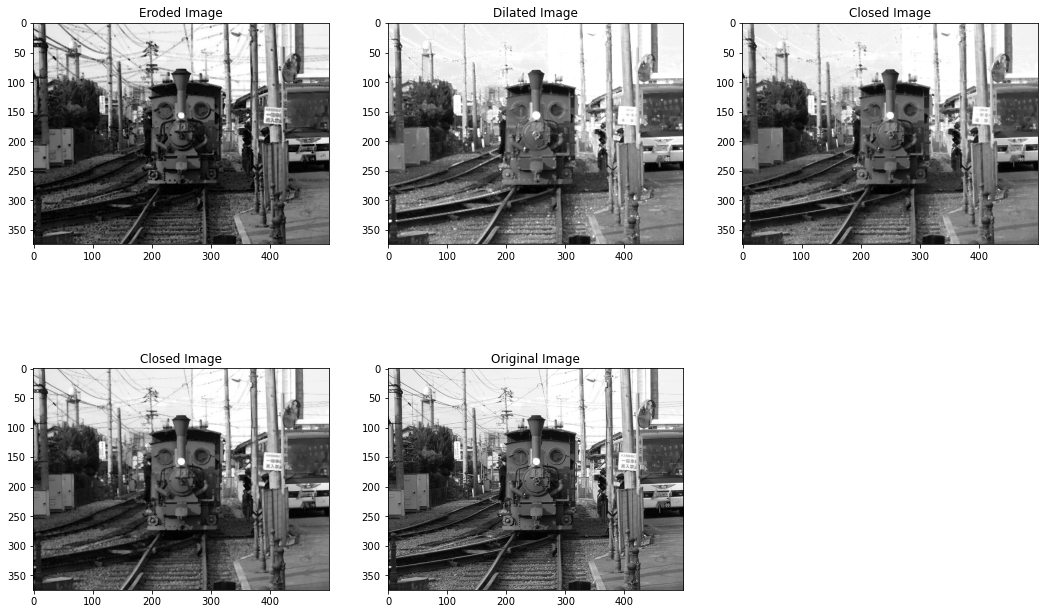

In [99]:
apply_morphology(image)

In [100]:
# image_file = "data/voc/train/002214.jpg"
# image = Image.open(image_file)
# apply_morphology(image)

### Thresholding

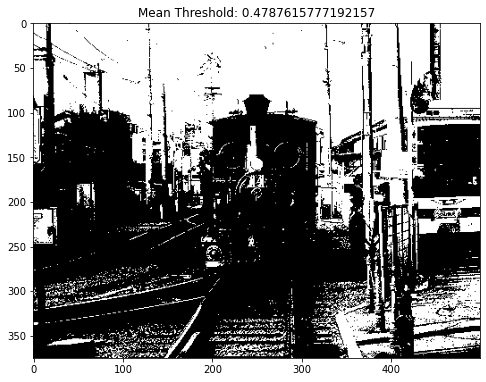

In [101]:
from skimage import io as sk_io, color as sk_col, morphology
from skimage.filters import threshold_mean


image = np.array(image)
bw_image = sk_col.rgb2gray(image)
mean_val = threshold_mean(bw_image)

binary_image = bw_image > mean_val

fig = plt.figure(figsize=(8,8))
plt.imshow(binary_image, cmap="gray")
plt.title("Mean Threshold: " + str(mean_val))
plt.show()

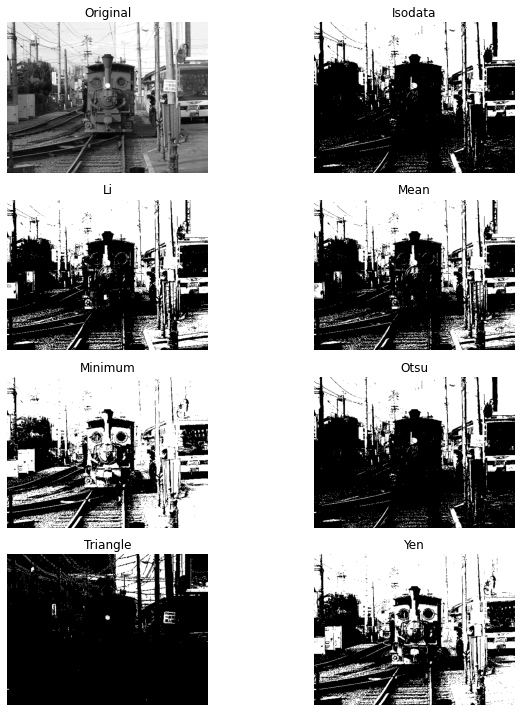

In [102]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(bw_image, figsize=(10, 10), verbose=False)
plt.show()

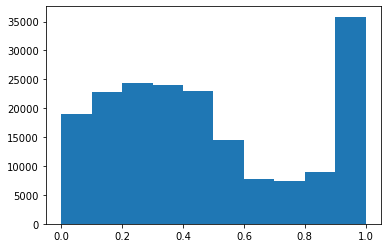

In [103]:
plt.hist(bw_image.ravel())
plt.show()

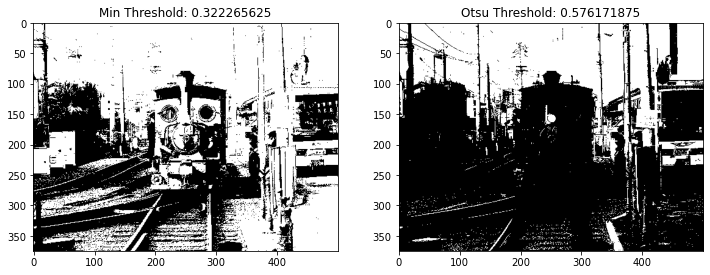

In [104]:
from skimage.filters import threshold_minimum, threshold_otsu

# Apply Minimum thresholding
min_val = threshold_minimum(bw_image)
binary_image_min = bw_image > min_val

# Apply Otsu thresholding
otsu_val = threshold_otsu(bw_image)
binary_image_otsu = bw_image > otsu_val

# Display the thresholded images
fig = plt.figure(figsize=(12,12))

# Minimum
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(binary_image_min, cmap="gray")
a.set_title("Min Threshold: " + str(min_val))

# Otsu
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(binary_image_otsu, cmap="gray")
a.set_title("Otsu Threshold: " + str(otsu_val))

plt.show()

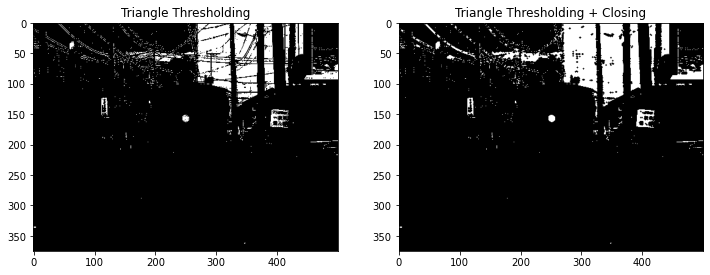

In [105]:
from skimage.filters import threshold_triangle

# Apply Triangle thresholding
tri_val = threshold_triangle(bw_image)
binary_image_tri = bw_image > tri_val

# Apply erosion
closed_image_tri = sk_mm.closing(binary_image_tri)

fig = plt.figure(figsize=(12,12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
plt.imshow(binary_image_tri, cmap="gray")
a.set_title("Triangle Thresholding")

# Plot eroded image
a=fig.add_subplot(1, 2, 2)
plt.imshow(closed_image_tri, cmap="gray")
a.set_title("Triangle Thresholding + Closing")

plt.show()

### Watershed Segmentation

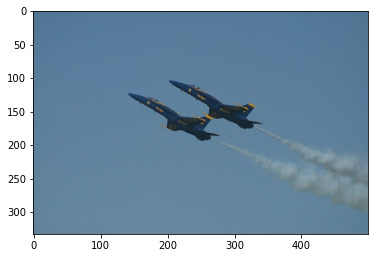

In [106]:
from skimage import io as sk_io
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
%matplotlib inline

# Load the image from the source file
planes_image_file = "data/object_detection/007280.jpg"
planes_image = sk_io.imread(planes_image_file)

fig = plt.figure(figsize=(6,6))
plt.imshow(planes_image)
plt.show()

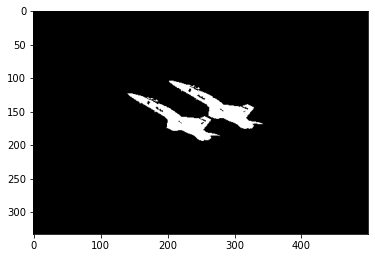

In [107]:
import numpy as np
from skimage import color as sk_col
from skimage.filters import threshold_otsu

# Convert to grayscale so we only have one channel
bw_planes = sk_col.rgb2gray(planes_image)
planes_otsu = threshold_otsu(bw_planes)
thresh_planes = bw_planes > planes_otsu

# Convert the thresholded image to its inverse
inverse_thresh = np.invert(thresh_planes)

fig = plt.figure(figsize=(6,6))
plt.imshow(inverse_thresh, "gray")
plt.show()

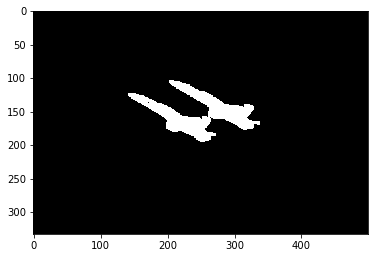

In [108]:
from skimage import morphology as sk_mm

# Use opening and dilation to find the background
kernel = sk_mm.selem.square(3)
opened_thresh = sk_mm.opening(inverse_thresh, kernel)
background = sk_mm.dilation(opened_thresh, kernel)

fig = plt.figure(figsize=(6,6))
plt.imshow(background,cmap="gray", interpolation='nearest')
plt.show()

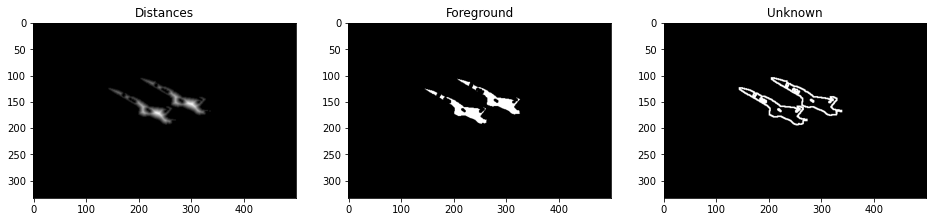

In [109]:
from scipy import ndimage as ndi
from skimage.filters import threshold_minimum

distance = ndi.distance_transform_edt(opened_thresh)

foreground_threshold = threshold_otsu(distance)
foreground = distance > foreground_threshold
foreground = np.uint8(foreground)

unknown = background - foreground

fig = plt.figure(figsize=(16,16))

a=fig.add_subplot(1, 3, 1)
plt.imshow(distance, cmap="gray")
a.set_title("Distances")

# Plot eroded image
a=fig.add_subplot(1, 3, 2)
plt.imshow(foreground, cmap="gray")
a.set_title("Foreground")

# Plot eroded image
a=fig.add_subplot(1, 3, 3)
plt.imshow(unknown, cmap="gray")
a.set_title("Unknown")

plt.show()



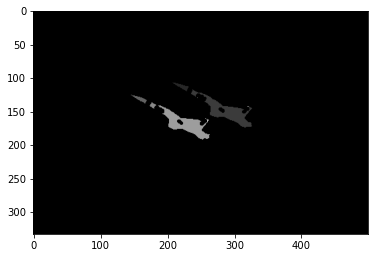

In [110]:
from skimage.feature import peak_local_max

local_maxi = peak_local_max(foreground, indices=False, footprint=np.ones((3, 3)), labels=inverse_thresh)
markers = ndi.label(local_maxi)[0]

fig = plt.figure(figsize=(6,6))
plt.imshow(markers, "gray")
plt.show()

c:\users\prasa\appdata\local\programs\python\python36\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


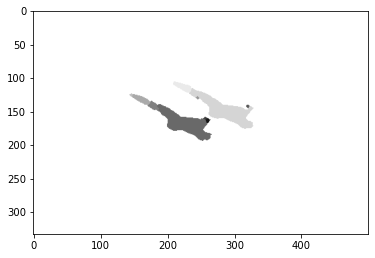

In [111]:
from skimage.morphology import watershed

# Apply watershed
labels = watershed(inverse_thresh, markers)

# Invert the image back so the background is white
inverted_labels = np.invert(labels)

fig = plt.figure(figsize=(6,6))
plt.imshow(inverted_labels, "gray")
plt.show()